In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('wine.data', header = None)
df.columns=['class identifier','Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df = df.drop(columns = 'class identifier')

In [223]:
df.isna().values.any()

False

In [4]:
np.random.seed(1)

In [7]:
#I start from k = 3, and I will start from only columns alcohol and Malic acid
k = 3
df.max()

Alcohol                           14.83
Malic acid                         5.80
Ash                                3.23
Alcalinity of ash                 30.00
Magnesium                        162.00
Total phenols                      3.88
Flavanoids                         5.08
Nonflavanoid phenols               0.66
Proanthocyanins                    3.58
Color intensity                   13.00
Hue                                1.71
OD280/OD315 of diluted wines       4.00
Proline                         1680.00
dtype: float64

In [8]:
df.min()

Alcohol                          11.03
Malic acid                        0.74
Ash                               1.36
Alcalinity of ash                10.60
Magnesium                        70.00
Total phenols                     0.98
Flavanoids                        0.34
Nonflavanoid phenols              0.13
Proanthocyanins                   0.41
Color intensity                   1.28
Hue                               0.48
OD280/OD315 of diluted wines      1.27
Proline                         278.00
dtype: float64

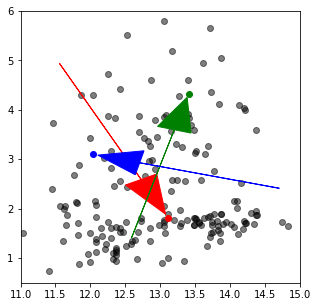

In [160]:
fig = plt.figure(figsize = (5,5))
ax = plt.axes()
plt.scatter(df['Alcohol'], df['Malic acid'],alpha = 0.5, color = 'k')
colmap = {1 :'r', 2 : 'g', 3 : 'b'}
for i in centroids:
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(11,15)
plt.ylim(0.5,6)
old = []
for i in old_centroids.keys():
    
    l = []
    for j in range(0,2):
        l.append(old_centroids[i][j])
    old.append(l)
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old[i-1][0], old[i-1][1], dx, dy, head_width=0.5, head_length=np.sqrt(dx**2+dy**2)*0.3, fc=colmap[i], ec=colmap[i])
plt.show()

In [164]:
A =df['clusters'].copy(deep=True)
A

0      1
1      1
2      1
3      1
4      1
      ..
173    2
174    2
175    2
176    1
177    2
Name: clusters, Length: 178, dtype: int64

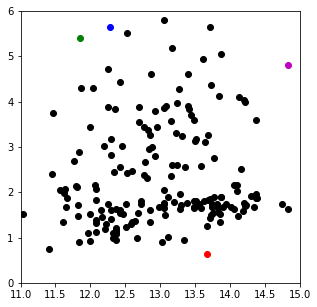

{1: [13.672254472678867, 0.6461934392238624], 2: [11.85869919985271, 5.404182721075373], 3: [12.281437132703017, 5.657429225507385], 4: [14.838526459505864, 4.8085451201946725]}
{1: [12.992248062015495, 1.738914728682171], 2: [12.379523809523809, 3.620952380952381], 3: [12.939999999999998, 5.002], 4: [13.627826086956517, 3.9347826086956514]}


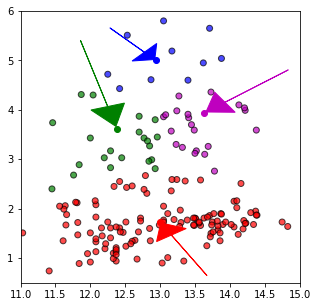

{1: [13.006747967479665, 1.6875609756097563], 2: [12.375652173913041, 3.3486956521739133], 3: [13.09, 5.05], 4: [13.579090909090906, 3.6718181818181814]}


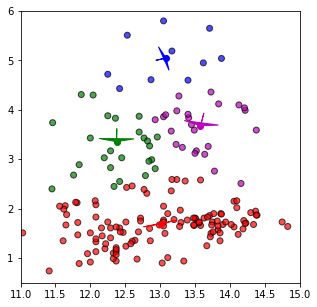

{1: [13.009411764705872, 1.6587394957983197], 2: [12.370399999999997, 3.2356000000000007], 3: [13.09, 5.05], 4: [13.57625, 3.6287499999999997]}


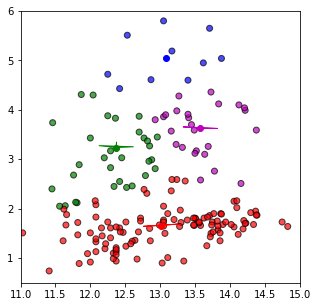

{1: [13.059107142857133, 1.6210714285714285], 2: [12.296129032258063, 3.036774193548387], 3: [13.09, 5.05], 4: [13.5764, 3.5867999999999993]}


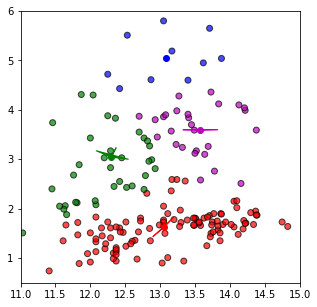

{1: [13.126320754716973, 1.5995283018867925], 2: [12.192857142857143, 2.8237142857142854], 3: [13.09, 5.05], 4: [13.52111111111111, 3.592222222222222]}


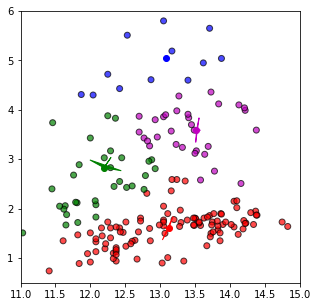

{1: [13.163495145631062, 1.5954368932038836], 2: [12.101562499999998, 2.556875], 3: [12.900833333333333, 4.925833333333333], 4: [13.426129032258064, 3.5680645161290325]}


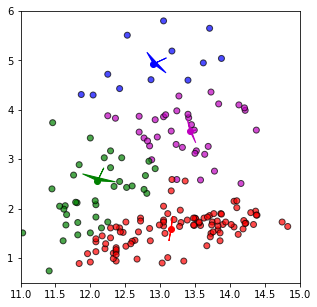

{1: [13.247789473684207, 1.5896842105263158], 2: [12.050555555555555, 2.2733333333333334], 3: [12.900833333333333, 4.925833333333333], 4: [13.341142857142856, 3.5400000000000005]}


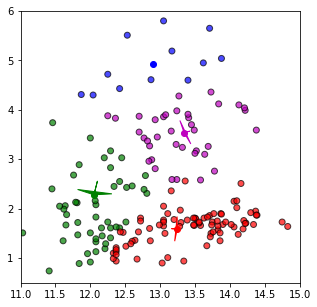

{1: [13.44456790123457, 1.6329629629629632], 2: [12.053541666666668, 1.97375], 3: [12.900833333333333, 4.925833333333333], 4: [13.289729729729727, 3.5067567567567575]}


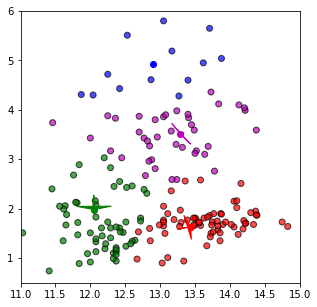

{1: [13.662835820895525, 1.7223880597014936], 2: [12.151034482758625, 1.6922413793103446], 3: [12.92923076923077, 4.876153846153846], 4: [13.1465, 3.47325]}


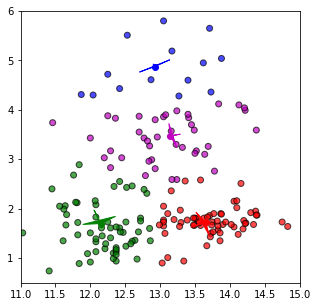

{1: [13.719682539682543, 1.7450793650793661], 2: [12.189, 1.6291666666666664], 3: [12.986428571428574, 4.839285714285714], 4: [13.088292682926827, 3.4251219512195124]}
yeeeeeee


In [2]:
import copy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('wine.data', header = None)
df.columns=['class identifier','Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df = df.drop(columns = 'class identifier')

k = 4

centroids = {
    i+1:[np.random.uniform(11,15), np.random.uniform(0.5,6)] for i in range(k)
}
fig = plt.figure(figsize = (5,5))
plt.scatter(df['Alcohol'], df['Malic acid'], color = 'k')
colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
for i in centroids:
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(11,15)
plt.ylim(0,6)
plt.show()
print(centroids)

def euclid(df, centroids):
    klust = []
    for i in range(len(df)):
        ds = []
        for h in range(1,k+1):
            dist = 0
            for j in range(2):
                #print(dist)
                if(centroids[h][j] == 'nan' ):
                    print('PORCAPUPAZZA')
                dist = dist + (df.loc[i][j]-centroids[h][j])**2
            dist = np.sqrt(dist)
            if(dist == 'nan' ):
                    print('PORCAPUPAZZA')
            ds.append(dist)
        klust.append(np.argmin(ds) + 1)
    df['clusters'] = klust
    df['color'] = df['clusters'].map(lambda x: colmap[x])
    return df
#put the first clusters
df = euclid(df, centroids)
df.head()

def new_centroids(df, centr, k):
    names = ['Alcohol', 'Malic acid']
    for i in range(1,k+1):
        for j in range(2):
            centr[i][j] = np.mean(df[df['clusters']==i][names[j]])
    return centr


#o = 0
while True:
    closest_centroids = df['clusters'].copy(deep=True)
    old_centroids = copy.deepcopy(centroids)
    centroids = new_centroids(df, centroids, k)
    df = euclid(df, centroids)
    print(centroids)
    if closest_centroids.equals(df['clusters']):
        print('yeeeeeee')
        break   
    fig = plt.figure(figsize = (5,5))
    ax = plt.axes()
    colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
    plt.scatter(df['Alcohol'], df['Malic acid'], alpha = 0.7, color = df['color'], edgecolor = 'k')
    for i in centroids:
        plt.scatter(*centroids[i], color = colmap[i])
    plt.xlim(11,15)
    plt.ylim(0.5,6)
    old = []
    for i in old_centroids.keys():
        l = []
        for j in range(0,2):
            l.append(old_centroids[i][j])
        old.append(l)
        dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
        dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
        ax.arrow(old[i-1][0], old[i-1][1], dx, dy, head_width=0.5, head_length=np.sqrt(dx**2+dy**2)*0.3, fc=colmap[i], ec=colmap[i])
    plt.show()
    #o = o+1
#plt.show()

Here the k-means clustering in all the dataset plotted only in 2 dimension, the first two columns.

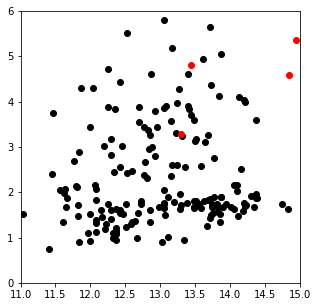

{1: [13.446295271007457, 4.798343404025737, 2.1469189002106868, 24.051437470724565, 156.1584330879696, 2.2283217591348263, 2.063685066961486, 0.1647086334234595, 2.935027325861643, 5.3502953778470985, 0.8760477243754611, 1.6385882125476048, 949.4646828030575], 2: [13.29535117642775, 3.2828262407981903, 1.7905251984610187, 26.768035855924424, 94.22643243168362, 1.3488571955431956, 4.905741804544428, 0.15559199488032158, 1.4372118663573255, 5.361840074588148, 0.7792714762565335, 2.706324408284054, 1276.8803645920655], 3: [14.94525047631425, 5.36462566064224, 2.163575397337412, 16.48371702075467, 150.09862002824144, 2.178835310484608, 1.6068279910847805, 0.13434022553857983, 3.309973083463876, 10.250684661795521, 0.9747945842916839, 1.382726324336979, 861.4873284062352], 4: [14.849319335172789, 4.577018759914418, 2.552478671636747, 11.017158761947755, 126.15391663237935, 2.9720331938775812, 1.2175443306276896, 0.13834755823456643, 1.9436198517096668, 3.374480119711085, 1.4007306118085958,

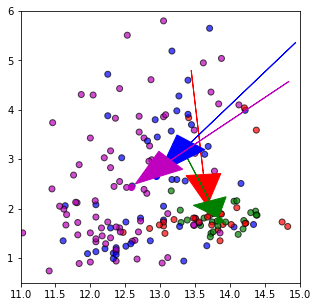

{1: [13.698148148148151, 1.944074074074074, 2.362222222222222, 17.27037037037037, 107.03703703703704, 2.7859259259259264, 2.9014814814814818, 0.27740740740740744, 1.940370370370371, 5.045925925925925, 1.067777777777778, 3.1866666666666665, 1042.851851851852], 2: [13.860000000000001, 1.7939130434782609, 2.5069565217391307, 17.07391304347826, 106.0, 2.9430434782608708, 3.110869565217391, 0.29869565217391303, 1.9260869565217387, 6.260000000000001, 1.1, 3.035652173913044, 1338.5652173913043], 3: [12.979400000000004, 2.5218000000000007, 2.3806000000000003, 19.614, 103.68, 2.108000000000001, 1.5692000000000002, 0.39099999999999996, 1.4943999999999995, 5.765, 0.8789200000000001, 2.3376, 736.86], 4: [12.519358974358973, 2.5132051282051284, 2.3175641025641025, 20.902564102564103, 92.84615384615384, 2.0541025641025645, 1.7033333333333336, 0.3910256410256409, 1.4329487179487184, 4.254743576923076, 0.9275641025641023, 2.463333333333334, 476.4102564102564]}


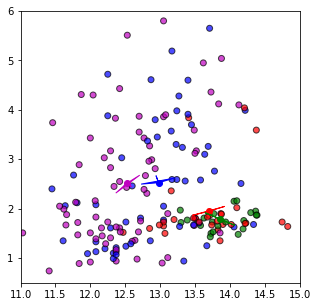

{1: [13.683793103448277, 1.9517241379310346, 2.374827586206896, 17.20344827586207, 106.96551724137932, 2.8241379310344823, 2.942068965517241, 0.2796551724137931, 1.9679310344827592, 5.136896551724137, 1.0644827586206898, 3.1886206896551723, 1052.8275862068965], 2: [13.8952380952381, 1.769047619047619, 2.503333333333334, 17.147619047619045, 106.0, 2.905238095238096, 3.0747619047619046, 0.29761904761904756, 1.8866666666666665, 6.250000000000002, 1.1076190476190475, 3.0185714285714282, 1352.952380952381], 3: [12.915789473684216, 2.520350877192983, 2.4005263157894734, 19.856140350877194, 102.66666666666667, 2.0964912280701764, 1.548947368421053, 0.3935087719298244, 1.486315789473684, 5.763508771929824, 0.8737894736842106, 2.3431578947368426, 722.5438596491229], 4: [12.525070422535212, 2.5135211267605633, 2.2953521126760563, 20.835211267605633, 92.59154929577464, 2.058028169014085, 1.732816901408451, 0.38901408450704217, 1.433380281690141, 4.107042239436619, 0.9364788732394366, 2.4712676056

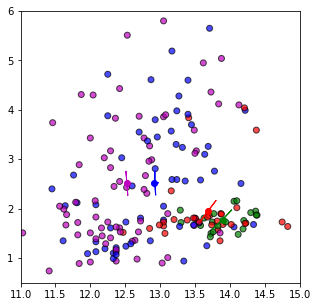

{1: [13.674000000000003, 1.9456666666666667, 2.383, 17.166666666666668, 106.5, 2.825, 2.9419999999999997, 0.2816666666666667, 1.9506666666666668, 5.125666666666666, 1.059666666666667, 3.1896666666666667, 1057.5666666666666], 2: [13.920500000000004, 1.7690000000000001, 2.4975, 17.199999999999996, 106.65, 2.9080000000000004, 3.0815, 0.2955, 1.9084999999999996, 6.322500000000001, 1.117, 3.0084999999999997, 1360.85], 3: [12.912372881355937, 2.5427118644067797, 2.4049152542372876, 19.903389830508473, 102.61016949152543, 2.0803389830508485, 1.525254237288136, 0.3920338983050846, 1.4628813559322031, 5.730847457627119, 0.8704406779661018, 2.3247457627118653, 718.3898305084746], 4: [12.516666666666666, 2.4942028985507245, 2.2885507246376817, 20.8231884057971, 92.34782608695652, 2.0707246376811597, 1.7584057971014495, 0.39014492753623176, 1.4518840579710146, 4.086956507246377, 0.941159420289855, 2.49072463768116, 458.231884057971]}


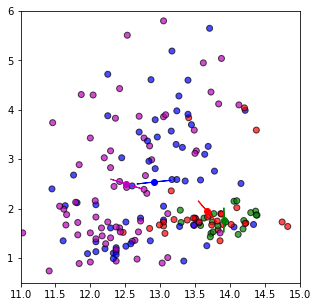

{1: [13.674000000000003, 1.9456666666666667, 2.383, 17.166666666666668, 106.5, 2.825, 2.9419999999999997, 0.2816666666666667, 1.9506666666666668, 5.125666666666666, 1.059666666666667, 3.1896666666666667, 1057.5666666666666], 2: [13.920500000000004, 1.7690000000000001, 2.4975, 17.199999999999996, 106.65, 2.9080000000000004, 3.0815, 0.2955, 1.9084999999999996, 6.322500000000001, 1.117, 3.0084999999999997, 1360.85], 3: [12.911166666666672, 2.549666666666667, 2.4083333333333328, 19.971666666666668, 102.58333333333333, 2.0843333333333343, 1.5098333333333336, 0.3943333333333332, 1.4519999999999997, 5.7173333333333325, 0.8707666666666668, 2.3218333333333345, 716.25], 4: [12.511911764705882, 2.487352941176471, 2.283823529411765, 20.776470588235295, 92.22058823529412, 2.0670588235294125, 1.7754411764705884, 0.3880882352941175, 1.4613235294117648, 4.074705867647059, 0.9419117647058823, 2.4957352941176474, 456.29411764705884]}
yeeeeeee


In [25]:
import copy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('wine.data', header = None)
df.columns=['class identifier','Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df = df.drop(columns = 'class identifier')

k = 4

centroids = {
    i+1:[np.random.uniform(11,15), np.random.uniform(0.5,6), np.random.uniform(1.3, 3.3), 
         np.random.uniform(10.5,30.1), np.random.uniform(69.9,162.1), np.random.uniform(0.97, 3.89), np.random.uniform(0.33, 5.09), np.random.uniform(0.12, 0.67), np.random.uniform(0.4, 3.59), np.random.uniform(1.27, 13.01), 
         np.random.uniform(0.47, 1.72), np.random.uniform(1.26, 4.01), np.random.uniform(277.9, 1680.01) ] for i in range(k)
}
fig = plt.figure(figsize = (5,5))
plt.scatter(df['Alcohol'], df['Malic acid'], color = 'k')
colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
for i in centroids:
    #print(i)
    plt.scatter(centroids[i][0], centroids[i][1], color = 'red')
plt.xlim(11,15)
plt.ylim(0,6)
plt.show()
print(centroids)

def euclid(df, centroids):
    klust = []
    for i in range(len(df)):
        ds = []
        for h in range(1,k+1):
            dist = 0
            for j in range(13):
                #print(dist)
                if(centroids[h][j] == 'nan' ):
                    print('PORCAPUPAZZA')
                dist = dist + (df.loc[i][j]-centroids[h][j])**2
            dist = np.sqrt(dist)
            if(dist == 'nan' ):
                    print('PORCAPUPAZZA')
            ds.append(dist)
        klust.append(np.argmin(ds) + 1)
    df['clusters'] = klust
    df['color'] = df['clusters'].map(lambda x: colmap[x])
    return df
#put the first clusters
df = euclid(df, centroids)
df.head()

def new_centroids(df, centr, k):
    names = ['Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
    for i in range(1,k+1):
        for j in range(13):
            centr[i][j] = np.mean(df[df['clusters']==i][names[j]])
    return centr


#o = 0
while True:
    closest_centroids = df['clusters'].copy(deep=True)
    old_centroids = copy.deepcopy(centroids)
    centroids = new_centroids(df, centroids, k)
    df = euclid(df, centroids)
    print(centroids)
    if closest_centroids.equals(df['clusters']):
        print('yeeeeeee')
        break   
    fig = plt.figure(figsize = (5,5))
    ax = plt.axes()
    colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
    plt.scatter(df['Alcohol'], df['Malic acid'], alpha = 0.7, color = df['color'], edgecolor = 'k')
    for i in centroids:
        plt.scatter(centroids[i][0], centroids[i][1], color = colmap[i])
    plt.xlim(11,15)
    plt.ylim(0.5,6)
    old = []
    for i in old_centroids.keys():
        l = []
        for j in range(0,13):
            l.append(old_centroids[i][j])
        old.append(l)
        d1 = (centroids[i][0] - old_centroids[i][0]) * 0.75
        d2 = (centroids[i][1] - old_centroids[i][1]) * 0.75
        #d3 = (centroids[i][2] - old_centroids[i][2]) * 0.75
        #d3 = (centroids[i][3] - old_centroids[i][3]) * 0.75
        #d4 = (centroids[i][4] - old_centroids[i][4]) * 0.75
        #d5= (centroids[i][5] - old_centroids[i][5]) * 0.75
        #d6= (centroids[i][6] - old_centroids[i][6]) * 0.75
       #d7= (centroids[i][7] - old_centroids[i][7]) * 0.75
        #d8= (centroids[i][8] - old_centroids[i][8]) * 0.75
        #d9= (centroids[i][9] - old_centroids[i][9]) * 0.75
        #d10 (centroids[i][10] - old_centroids[i][10]) * 0.75
        #d11 centroids[i][11] - old_centroids[i][11]) * 0.75
        #d12 (centroids[i][12] - old_centroids[i][12]) * 0.75
        #d13 = (centroids[i][13] - old_centroids[i][13]) * 0.75
        ax.arrow(old[i-1][0], old[i-1][1], d1, d2, head_width=0.5, head_length=np.sqrt(d1**2+d2**2)*0.3, fc=colmap[i], ec=colmap[i])
    plt.show()
    #o = o+1
#plt.show()

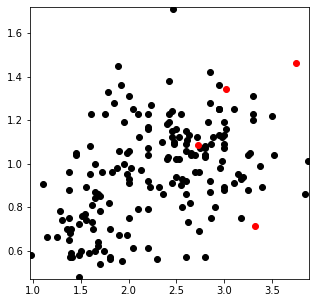

{1: [12.858551380182838, 2.2091107387538687, 2.645773418725162, 23.438804971775944, 98.23657421512415, 3.7537944603780398, 2.121221845644334, 0.5356872463099172, 2.528674416729142, 3.9244210983930423, 1.4632858520217127, 2.236152996549153, 1178.5257225772439], 2: [14.033967059572813, 4.327242369404813, 1.6950730131534613, 13.059544748247259, 92.05365600926507, 2.7233015880581557, 2.133899630254266, 0.18922572379087182, 0.7191461341340089, 7.386160576865997, 1.0864001482686685, 3.3213255317780668, 1560.4883129390569], 3: [14.592408670554782, 2.6250505077094686, 2.8748509587511437, 13.121340053189364, 142.40613245952173, 3.3194750182847566, 0.5333603546009587, 0.15303639785848255, 3.0014471871026394, 9.176362659261178, 0.7151147559901306, 3.0133336913745863, 717.2235947642964], 4: [14.820126784081465, 5.983104771214237, 1.4017575149712085, 15.088217999721714, 115.78490188163653, 3.023069606159691, 4.626763054628264, 0.3846362103684773, 2.6409433957786113, 4.293563146382276, 1.34424957504

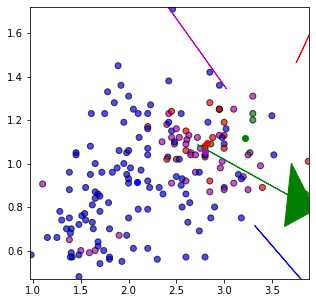

{1: [13.76235294117647, 1.7805882352941176, 2.5405882352941176, 17.358823529411765, 105.41176470588235, 2.8329411764705883, 2.9758823529411766, 0.308235294117647, 1.8235294117647058, 5.916470588235293, 1.095294117647059, 3.038235294117647, 1270.8823529411766], 2: [14.136666666666668, 1.8316666666666668, 2.4116666666666666, 16.266666666666666, 107.66666666666667, 3.2550000000000003, 3.493333333333334, 0.27166666666666667, 2.2166666666666663, 7.233333333333333, 1.1133333333333333, 3.0283333333333338, 1530.3333333333333], 3: [12.675948275862066, 2.5146551724137933, 2.330517241379309, 20.435344827586206, 95.84482758620689, 2.066034482758621, 1.6455172413793107, 0.3939655172413794, 1.4513793103448278, 4.765603439655174, 0.9147413793103447, 2.404913793103449, 549.3275862068965], 4: [13.459487179487182, 2.1258974358974356, 2.3907692307692305, 18.125641025641023, 107.64102564102564, 2.594358974358974, 2.532820512820513, 0.30358974358974355, 1.8082051282051277, 5.219230769230769, 1.000410256410

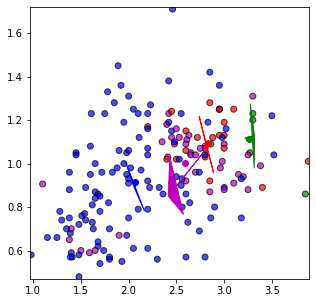

{1: [13.779500000000002, 1.765, 2.5120000000000005, 16.945, 104.5, 2.8465000000000007, 3.0475000000000003, 0.312, 1.922, 5.989, 1.106, 2.9929999999999994, 1251.75], 2: [14.136666666666668, 1.8316666666666668, 2.4116666666666666, 16.266666666666666, 107.66666666666667, 3.2550000000000003, 3.493333333333334, 0.27166666666666667, 2.2166666666666663, 7.233333333333333, 1.1133333333333333, 3.0283333333333338, 1530.3333333333333], 3: [12.647321428571427, 2.5178571428571432, 2.3281249999999987, 20.533035714285713, 95.39285714285714, 2.0508928571428573, 1.6206250000000002, 0.39732142857142866, 1.4401785714285713, 4.740446419642857, 0.9137499999999997, 2.3740178571428574, 541.0446428571429], 4: [13.430000000000003, 2.1895, 2.3945, 18.3475, 108.35, 2.5592499999999996, 2.44475, 0.30099999999999993, 1.7534999999999996, 5.155749999999999, 0.9821500000000002, 3.024, 953.325]}


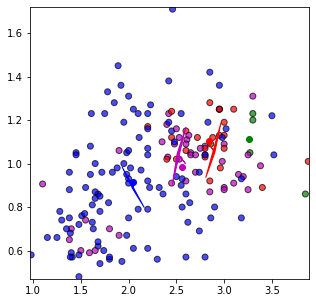

{1: [13.736363636363638, 1.7581818181818178, 2.5113636363636367, 17.154545454545453, 104.72727272727273, 2.8336363636363644, 3.0072727272727278, 0.3059090909090909, 1.9240909090909093, 5.921818181818182, 1.100909090909091, 2.972727272727272, 1239.090909090909], 2: [14.136666666666668, 1.8316666666666668, 2.4116666666666666, 16.266666666666666, 107.66666666666667, 3.2550000000000003, 3.493333333333334, 0.27166666666666667, 2.2166666666666663, 7.233333333333333, 1.1133333333333333, 3.0283333333333338, 1530.3333333333333], 3: [12.613364485981306, 2.519532710280374, 2.3248598130841107, 20.628037383177567, 94.42056074766356, 2.0459813084112146, 1.6236448598130844, 0.39794392523364486, 1.4307476635514018, 4.703738308411214, 0.9152336448598127, 2.380934579439253, 531.1869158878504], 4: [13.429302325581396, 2.2467441860465116, 2.389767441860465, 18.323255813953487, 109.32558139534883, 2.505581395348837, 2.333953488372093, 0.31325581395348834, 1.7316279069767437, 5.194418604651163, 0.9673488372

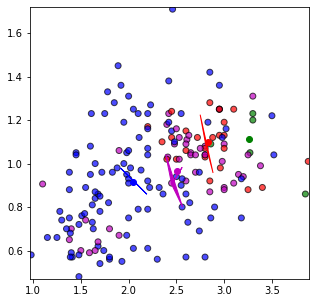

{1: [13.732916666666668, 1.7654166666666666, 2.520416666666667, 17.141666666666666, 104.79166666666667, 2.8308333333333344, 3.0104166666666674, 0.29958333333333337, 1.8987499999999997, 5.829583333333335, 1.0916666666666666, 2.9929166666666664, 1227.0833333333333], 2: [14.136666666666668, 1.8316666666666668, 2.4116666666666666, 16.266666666666666, 107.66666666666667, 3.2550000000000003, 3.493333333333334, 0.27166666666666667, 2.2166666666666663, 7.233333333333333, 1.1133333333333333, 3.0283333333333338, 1530.3333333333333], 3: [12.596952380952379, 2.4890476190476196, 2.3184761904761895, 20.625714285714285, 94.19047619047619, 2.0422857142857143, 1.6231428571428572, 0.3968571428571428, 1.4305714285714286, 4.678857133333332, 0.9166666666666663, 2.3818095238095243, 527.2571428571429], 4: [13.419069767441863, 2.352558139534884, 2.391627906976744, 18.49767441860465, 109.37209302325581, 2.4795348837209303, 2.2690697674418603, 0.3237209302325581, 1.7232558139534881, 5.249999999999999, 0.9603720

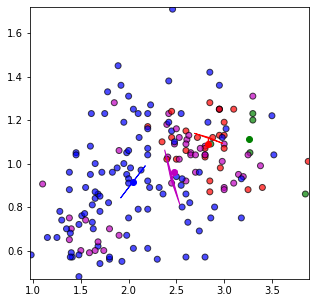

{1: [13.752, 1.8563999999999996, 2.5172000000000003, 17.212, 105.04, 2.831600000000001, 2.996000000000001, 0.29960000000000003, 1.8727999999999998, 5.806, 1.0828, 3.0064000000000006, 1221.2], 2: [14.136666666666668, 1.8316666666666668, 2.4116666666666666, 16.266666666666666, 107.66666666666667, 3.2550000000000003, 3.493333333333334, 0.27166666666666667, 2.2166666666666663, 7.233333333333333, 1.1133333333333333, 3.0283333333333338, 1530.3333333333333], 3: [12.598529411764705, 2.4534313725490198, 2.3218627450980382, 20.64607843137255, 93.69607843137256, 2.0536274509803922, 1.6475490196078433, 0.39598039215686276, 1.4250980392156867, 4.67333332352941, 0.9178431372549017, 2.3948039215686276, 521.5588235294117], 4: [13.343111111111115, 2.404888888888889, 2.378, 18.584444444444443, 109.44444444444444, 2.416444444444444, 2.162222222222222, 0.3311111111111111, 1.7266666666666663, 5.224666666666666, 0.9568000000000002, 2.8284444444444437, 889.6888888888889]}


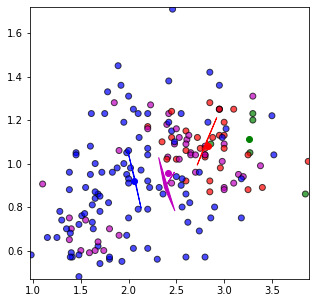

{1: [13.801724137931036, 1.910344827586207, 2.4927586206896555, 17.141379310344824, 106.06896551724138, 2.834137931034483, 2.998275862068966, 0.29551724137931035, 1.9068965517241376, 5.784137931034485, 1.073793103448276, 3.0506896551724143, 1199.3103448275863], 2: [14.136666666666668, 1.8316666666666668, 2.4116666666666666, 16.266666666666666, 107.66666666666667, 3.2550000000000003, 3.493333333333334, 0.27166666666666667, 2.2166666666666663, 7.233333333333333, 1.1133333333333333, 3.0283333333333338, 1530.3333333333333], 3: [12.602499999999997, 2.4636, 2.329299999999999, 20.696000000000005, 93.74, 2.0504, 1.6335000000000002, 0.3986999999999999, 1.4219000000000006, 4.694799989999998, 0.9118999999999997, 2.381700000000001, 517.75], 4: [13.227674418604654, 2.398139534883721, 2.3616279069767443, 18.73953488372093, 108.32558139534883, 2.3667441860465117, 2.0918604651162784, 0.3334883720930232, 1.6834883720930234, 5.109767441860464, 0.9631627906976746, 2.7923255813953483, 865.3488372093024]}


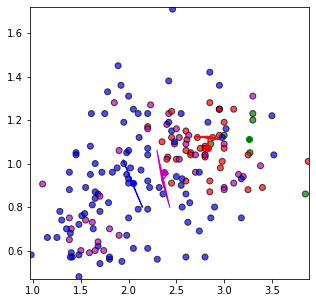

{1: [13.809117647058827, 1.9308823529411763, 2.4376470588235297, 16.841176470588234, 104.20588235294117, 2.8038235294117646, 2.968823529411765, 0.286764705882353, 1.8788235294117646, 5.618235294117646, 1.065, 3.115588235294118, 1166.1764705882354], 2: [14.084285714285715, 1.8414285714285714, 2.4499999999999997, 16.385714285714283, 108.71428571428571, 3.218571428571429, 3.3928571428571432, 0.2885714285714286, 2.1399999999999997, 7.1, 1.1157142857142857, 3.0142857142857147, 1508.142857142857], 3: [12.593877551020407, 2.4510204081632656, 2.3278571428571424, 20.694897959183674, 93.56122448979592, 2.0583673469387755, 1.650714285714286, 0.3960204081632653, 1.4264285714285718, 4.609183663265305, 0.9143877551020405, 2.3982653061224495, 514.1326530612245], 4: [13.123333333333333, 2.4905128205128206, 2.386666666666667, 19.351282051282052, 109.76923076923077, 2.2807692307692315, 1.9166666666666667, 0.3546153846153845, 1.6546153846153846, 5.331282051282051, 0.9434871794871796, 2.6364102564102563, 

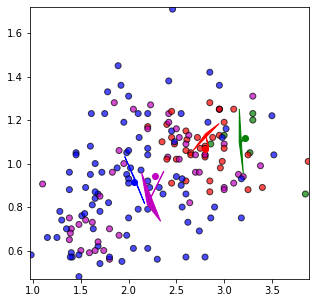

{1: [13.761944444444447, 1.9097222222222223, 2.430555555555556, 16.830555555555556, 103.77777777777777, 2.7836111111111106, 2.943055555555556, 0.2858333333333334, 1.8530555555555557, 5.518055555555557, 1.068888888888889, 3.118055555555556, 1157.9166666666667], 2: [14.084285714285715, 1.8414285714285714, 2.4499999999999997, 16.385714285714283, 108.71428571428571, 3.218571428571429, 3.3928571428571432, 0.2885714285714286, 2.1399999999999997, 7.1, 1.1157142857142857, 3.0142857142857147, 1508.142857142857], 3: [12.58775280898877, 2.4395505617977524, 2.31876404494382, 20.880898876404494, 93.14606741573034, 2.0608988764044947, 1.6633707865168545, 0.391123595505618, 1.4294382022471914, 4.5177527977528085, 0.915393258426966, 2.4182022471910116, 497.438202247191], 4: [13.038695652173917, 2.5458695652173917, 2.3960869565217395, 19.371739130434783, 107.97826086956522, 2.225434782608696, 1.8145652173913047, 0.3758695652173913, 1.6145652173913039, 5.4328260869565215, 0.9275217391304352, 2.528478260

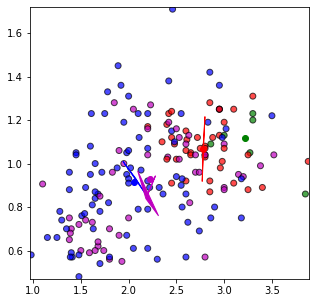

{1: [13.743589743589746, 1.8956410256410254, 2.4251282051282055, 17.156410256410258, 104.61538461538461, 2.795641025641025, 2.946666666666667, 0.28538461538461546, 1.8661538461538463, 5.434358974358975, 1.0751282051282052, 3.1269230769230774, 1144.7435897435898], 2: [14.084285714285715, 1.8414285714285714, 2.4499999999999997, 16.385714285714283, 108.71428571428571, 3.218571428571429, 3.3928571428571432, 0.2885714285714286, 2.1399999999999997, 7.1, 1.1157142857142857, 3.0142857142857147, 1508.142857142857], 3: [12.543373493975905, 2.477710843373494, 2.319036144578313, 20.90843373493976, 93.3855421686747, 2.039638554216867, 1.6749397590361454, 0.38831325301204817, 1.4138554216867472, 4.3140963734939755, 0.9265060240963853, 2.4346987951807235, 485.7831325301205], 4: [13.02897959183674, 2.518367346938776, 2.3883673469387756, 19.406122448979595, 105.34693877551021, 2.197551020408164, 1.7044897959183676, 0.3883673469387754, 1.5932653061224487, 5.727142857142856, 0.893591836734694, 2.44387755

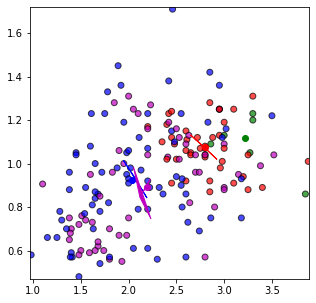

{1: [13.755500000000003, 1.89075, 2.422, 17.134999999999998, 104.95, 2.8057499999999997, 2.9480000000000004, 0.28475000000000006, 1.87025, 5.458, 1.07175, 3.1315000000000004, 1140.375], 2: [14.084285714285715, 1.8414285714285714, 2.4499999999999997, 16.385714285714283, 108.71428571428571, 3.218571428571429, 3.3928571428571432, 0.2885714285714286, 2.1399999999999997, 7.1, 1.1157142857142857, 3.0142857142857147, 1508.142857142857], 3: [12.542763157894735, 2.5198684210526316, 2.3106578947368424, 20.906578947368423, 92.26315789473684, 2.048947368421053, 1.698421052631579, 0.3952631578947367, 1.4260526315789477, 4.291052618421052, 0.9289473684210525, 2.453815789473685, 472.5], 4: [12.946363636363643, 2.4698181818181824, 2.392727272727273, 19.65636363636364, 105.14545454545454, 2.1463636363636374, 1.6447272727272728, 0.381090909090909, 1.5456363636363633, 5.567272727272727, 0.8935636363636363, 2.4005454545454548, 743.0]}


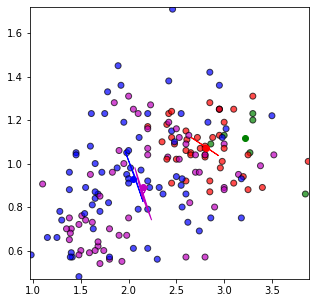

{1: [13.755500000000003, 1.89075, 2.422, 17.134999999999998, 104.95, 2.8057499999999997, 2.9480000000000004, 0.28475000000000006, 1.87025, 5.458, 1.07175, 3.1315000000000004, 1140.375], 2: [14.084285714285715, 1.8414285714285714, 2.4499999999999997, 16.385714285714283, 108.71428571428571, 3.218571428571429, 3.3928571428571432, 0.2885714285714286, 2.1399999999999997, 7.1, 1.1157142857142857, 3.0142857142857147, 1508.142857142857], 3: [12.514444444444443, 2.515833333333333, 2.304027777777778, 20.82361111111111, 92.73611111111111, 2.05375, 1.7369444444444446, 0.3919444444444443, 1.4280555555555556, 4.102777763888888, 0.9405555555555556, 2.471666666666667, 464.2361111111111], 4: [12.953559322033904, 2.478135593220339, 2.395254237288135, 19.84237288135593, 103.69491525423729, 2.1338983050847466, 1.6013559322033903, 0.38610169491525415, 1.5350847457627117, 5.710508474576271, 0.8817966101694916, 2.382372881355933, 734.7457627118644]}


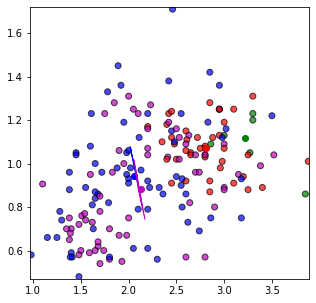

{1: [13.755500000000003, 1.89075, 2.422, 17.134999999999998, 104.95, 2.8057499999999997, 2.9480000000000004, 0.28475000000000006, 1.87025, 5.458, 1.07175, 3.1315000000000004, 1140.375], 2: [14.084285714285715, 1.8414285714285714, 2.4499999999999997, 16.385714285714283, 108.71428571428571, 3.218571428571429, 3.3928571428571432, 0.2885714285714286, 2.1399999999999997, 7.1, 1.1157142857142857, 3.0142857142857147, 1508.142857142857], 3: [12.516666666666666, 2.4942028985507245, 2.2885507246376817, 20.8231884057971, 92.34782608695652, 2.0707246376811597, 1.7584057971014495, 0.39014492753623176, 1.4518840579710146, 4.086956507246377, 0.941159420289855, 2.49072463768116, 458.231884057971], 4: [12.929838709677425, 2.504032258064516, 2.408064516129032, 19.89032258064516, 103.59677419354838, 2.111129032258065, 1.5840322580645168, 0.3883870967741935, 1.5033870967741934, 5.6503225806451605, 0.883967741935484, 2.3654838709677426, 728.3387096774194]}


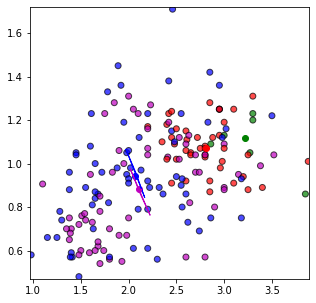

{1: [13.724146341463419, 1.8817073170731706, 2.416585365853659, 17.180487804878048, 106.34146341463415, 2.798292682926829, 2.9314634146341465, 0.28560975609756106, 1.9046341463414636, 5.38829268292683, 1.07390243902439, 3.119268292682927, 1135.4146341463415], 2: [14.084285714285715, 1.8414285714285714, 2.4499999999999997, 16.385714285714283, 108.71428571428571, 3.218571428571429, 3.3928571428571432, 0.2885714285714286, 2.1399999999999997, 7.1, 1.1157142857142857, 3.0142857142857147, 1508.142857142857], 3: [12.516666666666666, 2.4942028985507245, 2.2885507246376817, 20.8231884057971, 92.34782608695652, 2.0707246376811597, 1.7584057971014495, 0.39014492753623176, 1.4518840579710146, 4.086956507246377, 0.941159420289855, 2.49072463768116, 458.231884057971], 4: [12.937377049180332, 2.52016393442623, 2.4114754098360653, 19.904918032786885, 102.63934426229508, 2.1047540983606563, 1.5727868852459022, 0.3895081967213114, 1.474262295081967, 5.700327868852458, 0.8794426229508197, 2.3611475409836

In [24]:
import copy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('wine.data', header = None)
df.columns=['class identifier','Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df = df.drop(columns = 'class identifier')

k = 4

centroids = {
    i+1:[np.random.uniform(11,15), np.random.uniform(0.5,6), np.random.uniform(1.3, 3.3), 
         np.random.uniform(10.5,30.1), np.random.uniform(69.9,162.1), np.random.uniform(0.97, 3.89), np.random.uniform(0.33, 5.09), np.random.uniform(0.12, 0.67), np.random.uniform(0.4, 3.59), np.random.uniform(1.27, 13.01), 
         np.random.uniform(0.47, 1.72), np.random.uniform(1.26, 4.01), np.random.uniform(277.9, 1680.01) ] for i in range(k)
}
fig = plt.figure(figsize = (5,5))
plt.scatter(df['Total phenols'], df['Hue'], color = 'k')
colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
for i in centroids:
    #print(i)
    plt.scatter(centroids[i][5], centroids[i][10], color = 'red')
plt.xlim(0.97, 3.89)
plt.ylim(0.47, 1.72)
plt.show()
print(centroids)

def euclid(df, centroids):
    klust = []
    for i in range(len(df)):
        ds = []
        for h in range(1,k+1):
            dist = 0
            for j in range(13):
                #print(dist)
                if(centroids[h][j] == 'nan' ):
                    print('PORCAPUPAZZA')
                dist = dist + (df.loc[i][j]-centroids[h][j])**2
            dist = np.sqrt(dist)
            if(dist == 'nan' ):
                    print('PORCAPUPAZZA')
            ds.append(dist)
        klust.append(np.argmin(ds) + 1)
    df['clusters'] = klust
    df['color'] = df['clusters'].map(lambda x: colmap[x])
    return df
#put the first clusters
df = euclid(df, centroids)
df.head()

def new_centroids(df, centr, k):
    names = ['Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
    for i in range(1,k+1):
        for j in range(13):
            centr[i][j] = np.mean(df[df['clusters']==i][names[j]])
    return centr


#o = 0
while True:
    closest_centroids = df['clusters'].copy(deep=True)
    old_centroids = copy.deepcopy(centroids)
    centroids = new_centroids(df, centroids, k)
    df = euclid(df, centroids)
    print(centroids)
    if closest_centroids.equals(df['clusters']):
        print('yeeeeeee')
        break   
    fig = plt.figure(figsize = (5,5))
    ax = plt.axes()
    colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
    plt.scatter(df['Total phenols'], df['Hue'], alpha = 0.7, color = df['color'], edgecolor = 'k')
    for i in centroids:
        plt.scatter(centroids[i][5], centroids[i][10], color = colmap[i])
    plt.xlim(0.97, 3.89)
    plt.ylim(0.47, 1.72)
    old = []
    for i in old_centroids.keys():
        l = []
        for j in range(0,13):
            l.append(old_centroids[i][j])
        old.append(l)
        #d1 = (centroids[i][0] - old_centroids[i][0]) * 0.75
        #d2 = (centroids[i][1] - old_centroids[i][1]) * 0.75
        #d3 = (centroids[i][2] - old_centroids[i][2]) * 0.75
        #d3 = (centroids[i][3] - old_centroids[i][3]) * 0.75
        #d4 = (centroids[i][4] - old_centroids[i][4]) * 0.75
        #d5= (centroids[i][5] - old_centroids[i][5]) * 0.75
        d6= (centroids[i][6] - old_centroids[i][6]) * 0.75
       #d7= (centroids[i][7] - old_centroids[i][7]) * 0.75
        #d8= (centroids[i][8] - old_centroids[i][8]) * 0.75
        #d9= (centroids[i][9] - old_centroids[i][9]) * 0.75
        #d10 (centroids[i][10] - old_centroids[i][10]) * 0.75
        d11 = (centroids[i][11] - old_centroids[i][11]) * 0.75
        #d12 (centroids[i][12] - old_centroids[i][12]) * 0.75
        #d13 = (centroids[i][13] - old_centroids[i][13]) * 0.75
        ax.arrow(old[i-1][5], old[i-1][10], d6, d11, head_width=0.3, head_length=np.sqrt(d6**2+d11**2)*0.3, fc=colmap[i], ec=colmap[i])
    plt.show()
    #o = o+1
#plt.show()